##  Import Libraries

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from skimage.util import random_noise
from skimage.filters import gaussian
from skimage import filters

In [3]:
# Function to display original, noisy, and denoised images
def show_images(original, noisy, denoised, title):
    plt.figure(figsize=(10, 5))

    # Display original image
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Display noisy image
    plt.subplot(1, 3, 2)
    plt.imshow(noisy, cmap='gray')
    plt.title(f' {title}')
    plt.axis('off')

    # Display denoised image
    plt.subplot(1, 3, 3)
    plt.imshow(denoised, cmap='gray')
    plt.title(f'Denoised {title}')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

#### Image Smoothing (Denoising) 

In [4]:
# Load the image
image = cv2.imread("download.jpeg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define Mean Filter (Box Filter)
kernel_size = 3   # Size of the kernel
box_filter_kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)

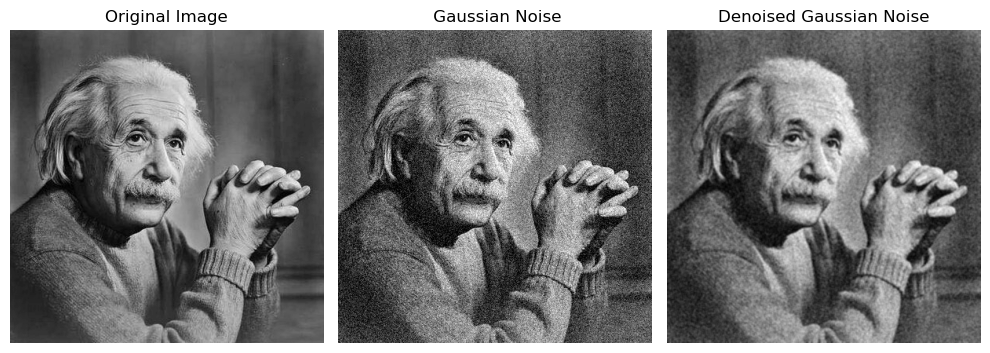

In [7]:

# Add Gaussian noise (mean=0, variance=0.01)
gaussian_noise = random_noise(image_gray, mode='gaussian', mean=0, var=0.01)
gaussian_noise = (gaussian_noise * 255).astype(np.uint8)

# Apply Box Filter to denoise Gaussian noise`
gaussian_denoised = cv2.filter2D(gaussian_noise, -1, box_filter_kernel)
show_images(image_gray, gaussian_noise, gaussian_denoised, "Gaussian Noise")


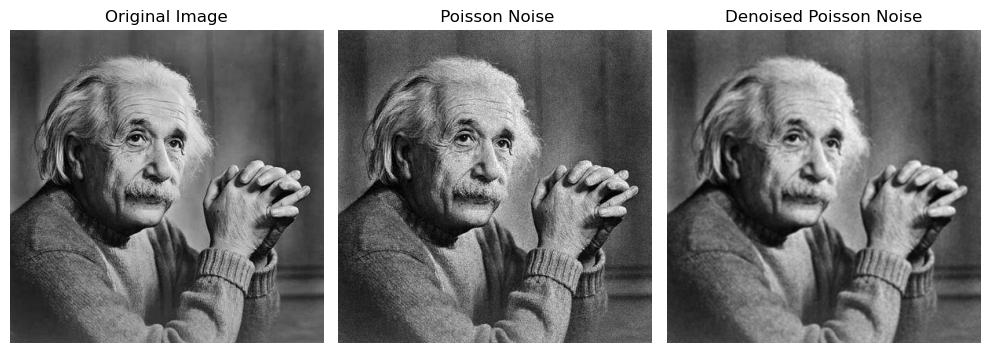

In [8]:

# Add Poisson noise
poisson_noise = random_noise(image_gray, mode='poisson')
poisson_noise = (poisson_noise * 255).astype(np.uint8)

# Apply Box Filter to denoise Poisson noise
poisson_denoised = cv2.filter2D(poisson_noise, -1, box_filter_kernel)
show_images(image_gray, poisson_noise, poisson_denoised, "Poisson Noise")

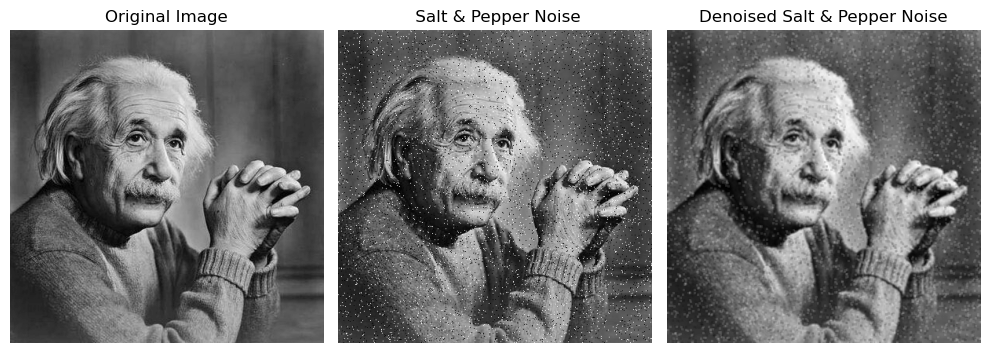

In [9]:
# Add Salt and Pepper noise
salt_pepper_noise = random_noise(image_gray, mode='s&p', amount=0.05)
salt_pepper_noise = (salt_pepper_noise * 255).astype(np.uint8)

# Apply Box Filter to denoise Salt and Pepper noise
salt_pepper_denoised = cv2.filter2D(salt_pepper_noise, -1, box_filter_kernel)
show_images(image_gray, salt_pepper_noise, salt_pepper_denoised, "Salt & Pepper Noise")

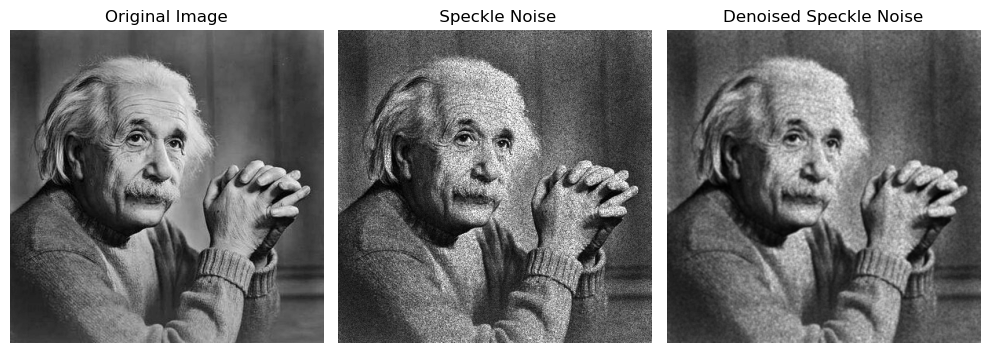

In [10]:
# Add Speckle noise
speckle_noise = random_noise(image_gray, mode='speckle', mean=0, var=0.05)
speckle_noise = (speckle_noise * 255).astype(np.uint8)

# Apply Box Filter to denoise Speckle noise
speckle_denoised = cv2.filter2D(speckle_noise, -1, box_filter_kernel)
show_images(image_gray, speckle_noise, speckle_denoised, "Speckle Noise")

#### Gaussian Filter 

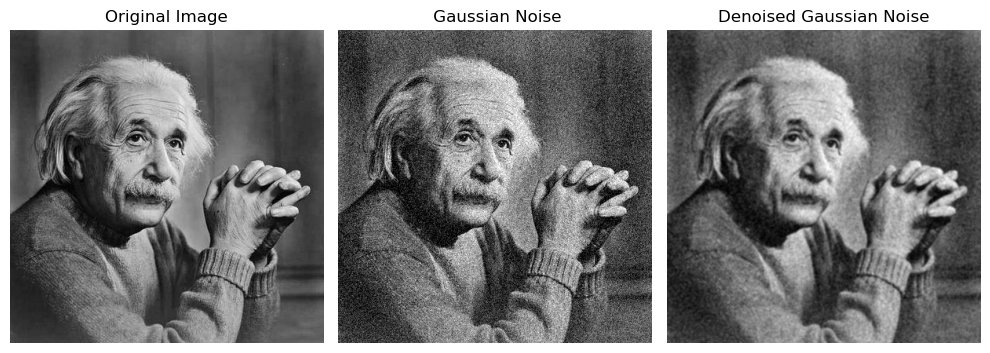

In [15]:
gaussian_noise = random_noise(image_gray, mode='gaussian', mean=0, var=0.01)
gaussian_noise = (gaussian_noise * 255).astype(np.uint8)

# Apply Gaussian filter from skimage to denoise Gaussian noise
gaussian_denoised = gaussian(gaussian_noise, sigma=1, mode='reflect')
show_images(image_gray, gaussian_noise, gaussian_denoised, "Gaussian Noise")

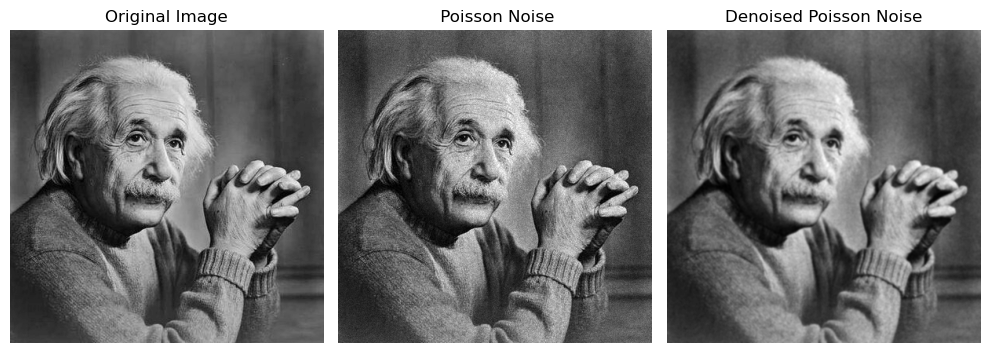

In [12]:
# Add Poisson noise
poisson_noise = random_noise(image_gray, mode='poisson')
poisson_noise = (poisson_noise * 255).astype(np.uint8)

# Apply Gaussian filter from skimage to denoise Poisson noise
poisson_denoised = gaussian(poisson_noise, sigma=1, mode='reflect')
show_images(image_gray, poisson_noise, poisson_denoised, "Poisson Noise")


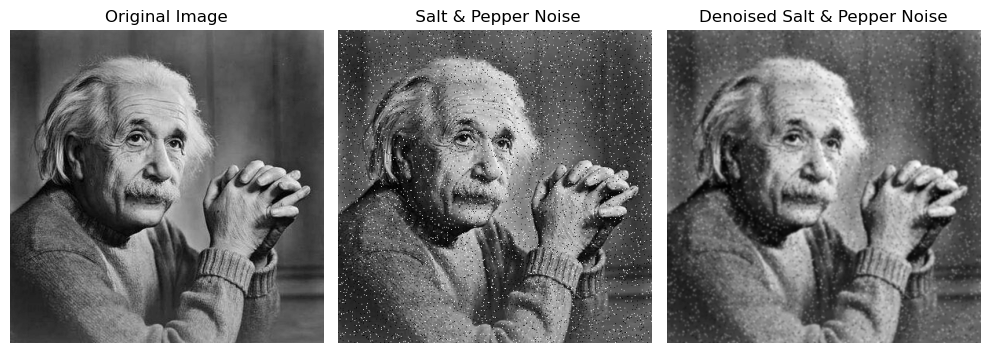

In [8]:
# Add Salt and Pepper noise (5% of total pixels)
salt_pepper_noise = random_noise(image_gray, mode='s&p', amount=0.05)
salt_pepper_noise = (salt_pepper_noise * 255).astype(np.uint8)

# Apply Gaussian filter from skimage to denoise Salt and Pepper noise
salt_pepper_denoised = gaussian(salt_pepper_noise, sigma=1, mode='reflect')
show_images(image_gray, salt_pepper_noise, salt_pepper_denoised, "Salt & Pepper Noise")


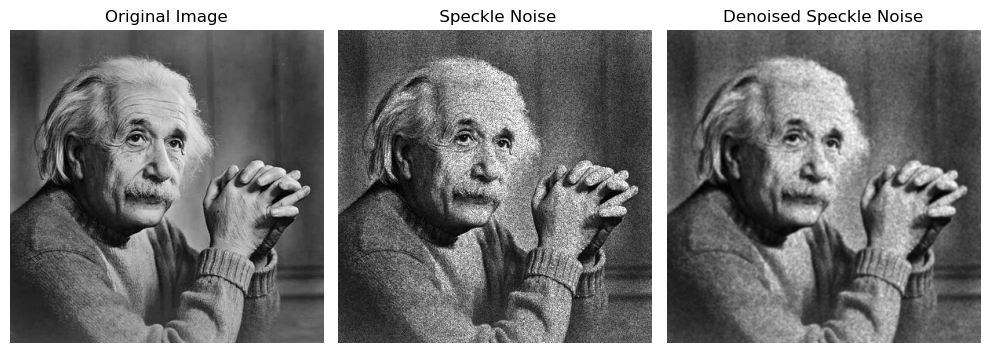

In [18]:
# Add Speckle noise
speckle_noise = random_noise(image_gray, mode='speckle', mean=0, var=0.05)
speckle_noise = (speckle_noise * 255).astype(np.uint8)

# Apply Gaussian filter from skimage to denoise Speckle noise
speckle_denoised = gaussian(speckle_noise, sigma=1, mode='reflect')
show_images(image_gray, speckle_noise, speckle_denoised, "Speckle Noise")

#### Image Sharpening  

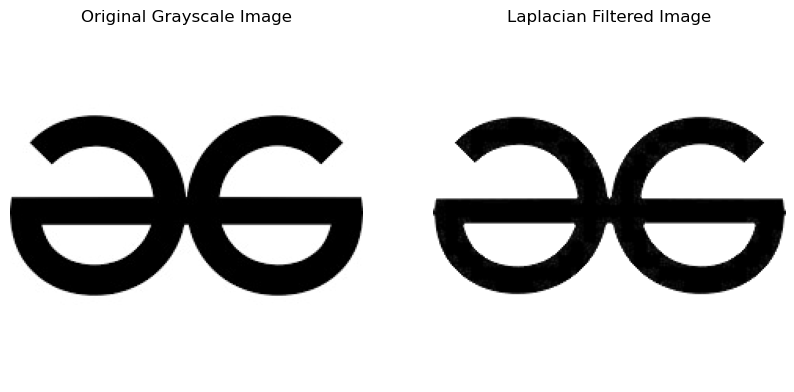

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. تعريف مرشح لابلاسيان
laplacian_filter = np.array([[ 0, 1, 0],
                             [ 1, -4, 1],
                             [ 0, 1, 0]])

# 2. تحميل الصورة باستخدام OpenCV
image = cv2.imread('download (1).jpeg')  # استبدل باسم ملف الصورة لديك

# 3. تحويل الصورة إلى التدرج الرمادي
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 4. تطبيق مرشح لابلاسيان باستخدام دالة filter2D من OpenCV
laplacian_filtered = cv2.filter2D(image_gray, -1, laplacian_filter)

# 5. عرض الصورة الأصلية والصورة بعد الفلتر
plt.figure(figsize=(10, 5))

# الصورة الأصلية باللون الرمادي
plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

# الصورة بعد تطبيق مرشح لابلاسيان
plt.subplot(1, 2, 2)
plt.title("Laplacian Filtered Image")
plt.imshow(laplacian_filtered, cmap='gray')
plt.axis('off')

plt.show()
